<a href="https://colab.research.google.com/github/lcnychh/da_nychh/blob/master/DA_Unit3_L3%264_07242020_Part2_LC_Project1_NY_IL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 1 - COVID-19 Data Analysis**

**The Data Background**

The following is noted from the datasource link:

The New York Times is releasing a series of data files with **cumulative counts** of coronavirus cases in the United States, at the state and county level, over time. We are compiling this time series data from state and local governments and health departments in an attempt to provide a complete record of the ongoing outbreak.

Since late January, The Times has tracked cases of coronavirus in real time as they were identified after testing. Because of the widespread shortage of testing, however, the data is necessarily limited in the picture it presents of the outbreak.

The data begins with the first reported coronavirus case in Washington State on Jan. 21, 2020.

The Times are providing two sets of data with cumulative counts of coronavirus cases and deaths: one with most current numbers for each geography and another with **historical data showing the tally for each day for each geography.**

The historical data files are at the top level of the directory and contain data up to, but not including the current day. The live data files are in the live/ directory.

A key difference between the historical and live files is that the numbers in the **historical files are the final counts at the end of each day**, while the live files have figures that may be a partial count released during the day but cannot necessarily be considered the final, end-of-day tally.

Each row of data reports the cumulative number of coronavirus cases and deaths based on our best reporting up to the moment we publish an update. Our counts include both laboratory confirmed and probable cases using criteria that were developed by states and the federal government. Not all geographies are reporting probable cases and yet others are providing confirmed and probable as a single total.

**State and county files contain FIPS codes, a standard geographic identifier**, to make it easier for an analyst to combine this data with other data sets like a map file or population data.

**Please note: The historical data is used for this analysis (not the live data).**



**Research Questions**

Please note: Since New York Times data is updated daily, answers are based on data ran as of 7/28/2020, 12:52am (date of completion of project).

Research Question - 1 - Insight into raw data - How many records/ columns? There are 8,044 rows and 5 columns for all states.

Research Question - 2 - Was there subsetting data by state? Yes, subset is New York and Illinois.

Research Question - 3 - Were new columns added? Yes, since cases and deaths are cumulative, new cases, new deaths, percent change per day were created.

Research Question - 4 - Were visuals/ plots/ graphs/ figures used? Yes, Pandas functions were used to pivot the dataframe to get the monthly case count for New York and Illinois.

Research Question - 5 - Were other libraries used? Yes, plotly library was explored in order to make interactive plots/ graphs.

The following libraries were imported:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

**All States data for Covid-19**

In [ ]:
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


^As noted, the data begins with the first reported coronavirus case in Washington State on Jan. 21, 2020.

In [ ]:
df.shape

(8044, 5)

In [ ]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

^There are 8,044 datapoints and 5 features in the dataframe as of 7/28/20.

**New York data for Covid-19**

In [ ]:
ny_df = df[df['state']=='New York']

In [ ]:
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


^First case in New York is on March 1, 2020.

In [ ]:
ny_df.shape

(148, 5)

^There are 148 columns and 5 columns for the New York subset.

In [ ]:
ny_df.tail()

,date,state,fips,cases,deaths
7802,2020-07-22,New York,36,413595,32228
7857,2020-07-23,New York,36,414405,32270
7912,2020-07-24,New York,36,415163,32278
7967,2020-07-25,New York,36,415911,32295
8022,2020-07-26,New York,36,416443,32305


^As of July 28, 2020, there are 416,443 cases and 32,305 deaths.

In [ ]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


^First death in New York is on March 14, 2020 with 610 cases accumulated up to that day.

In [ ]:
#total number of cases
ny_df['cases'].max()

416443

In [ ]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()

39899780

**Data Wrangling for NY - extracting and adding new variables**

Adding new_cases column

In [ ]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [ ]:
ny_df['new_cases'] = newcase

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


**Performing analysis by month**

Case date is added in order to add month variable

In [ ]:
ny_df['case_date'] = pd.to_datetime(ny_df['date'])
ny_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,state,fips,cases,deaths,new_cases,case_date
246,2020-03-01,New York,36,1,0,1,2020-03-01
261,2020-03-02,New York,36,1,0,0,2020-03-02
276,2020-03-03,New York,36,2,0,1,2020-03-03
293,2020-03-04,New York,36,11,0,9,2020-03-04
313,2020-03-05,New York,36,22,0,11,2020-03-05


In [ ]:
ny_df['date'].dtype

dtype('O')

In [ ]:
ny_df['case_date'].dtype

dtype('<M8[ns]')

In [ ]:
ny_df.shape

(148, 7)

In [ ]:
pd.DatetimeIndex(ny_df['case_date']).month

Int64Index([3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
            ...
            7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
           dtype='int64', name='case_date', length=148)

In [ ]:
ny_df['month'] = pd.DatetimeIndex(ny_df['case_date']).month
ny_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,state,fips,cases,deaths,new_cases,case_date,month
246,2020-03-01,New York,36,1,0,1,2020-03-01,3
261,2020-03-02,New York,36,1,0,0,2020-03-02,3
276,2020-03-03,New York,36,2,0,1,2020-03-03,3
293,2020-03-04,New York,36,11,0,9,2020-03-04,3
313,2020-03-05,New York,36,22,0,11,2020-03-05,3


Summary of new cases by month

In [ ]:
ny_df.pivot_table(index='month',values='new_cases',aggfunc='sum')

,new_cases
month,
3,76211
4,233485
5,65879
6,22567
7,18301


In [ ]:
ny_df.groupby('month')['new_cases'].sum()

month
3     76211
4    233485
5     65879
6     22567
7     18301
Name: new_cases, dtype: int64

In [ ]:
ny_monthly_data =  ny_df.pivot_table(index='month',values='new_cases',aggfunc='sum')
ny_monthly_data.head()

,new_cases
month,
3,76211
4,233485
5,65879
6,22567
7,18301


Resetting index

In [ ]:
ny_monthly_data = ny_monthly_data.reset_index()
ny_monthly_data

,month,new_cases
0,3,76211
1,4,233485
2,5,65879
3,6,22567
4,7,18301


Adding variable for percentage change for new cases

In [ ]:
ny_monthly_data['new_cases'].pct_change()

0         NaN
1    2.063665
2   -0.717845
3   -0.657448
4   -0.189037
Name: new_cases, dtype: float64

In [ ]:
# (233485 - 76211)/ 76211 * 100

In [ ]:
ny_monthly_data['case_percent_change'] = round((ny_monthly_data['new_cases'].pct_change())* 100,2)
ny_monthly_data

,month,new_cases,case_percent_change
0,3,76211,NaN
1,4,233485,206.37
2,5,65879,-71.78
3,6,22567,-65.74
4,7,18301,-18.90


**Illinois data for Covid-19**

In [ ]:
il_df = df[df['state']=='Illinois']

In [ ]:
il_df.head()

,date,state,fips,cases,deaths
3,2020-01-24,Illinois,17,1,0
6,2020-01-25,Illinois,17,1,0
10,2020-01-26,Illinois,17,1,0
14,2020-01-27,Illinois,17,1,0
18,2020-01-28,Illinois,17,1,0


^First case in Illinois is on January 24, 2020.

In [ ]:
il_df.shape

(185, 5)

^There are 185 columns and 5 columns for the Illinois subset.

In [ ]:
il_df.tail()

,date,state,fips,cases,deaths
7783,2020-07-22,Illinois,17,167142,7544
7838,2020-07-23,Illinois,17,168766,7563
7893,2020-07-24,Illinois,17,170376,7580
7948,2020-07-25,Illinois,17,171669,7593
8003,2020-07-26,Illinois,17,173079,7595


^As of July 26, 2020, there are 173,079 cases and 7,595 deaths.

In [ ]:
#first death in IL
first_il_death = il_df[il_df['deaths']!=0]
first_il_death.head()

,date,state,fips,cases,deaths
809,2020-03-17,Illinois,17,159,1
863,2020-03-18,Illinois,17,286,1
917,2020-03-19,Illinois,17,420,4
971,2020-03-20,Illinois,17,583,5
1025,2020-03-21,Illinois,17,751,6


^First death in Illinois is on March 17, 2020 with 159 cases accumulated up to that day.

In [ ]:
#total number of cases
il_df['cases'].max()

173079

**Data Wrangling for Illinois - extracting and adding new variables**

Adding new_cases column

In [ ]:
#new cases for IL
# type(il_df['cases'])

newcase = []
previous_case = 0
for index, row in il_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previous_case
  previous_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [ ]:
il_df['new_cases'] = newcase

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
il_df.head(10)

,date,state,fips,cases,deaths,new_cases
3,2020-01-24,Illinois,17,1,0,1
6,2020-01-25,Illinois,17,1,0,0
10,2020-01-26,Illinois,17,1,0,0
14,2020-01-27,Illinois,17,1,0,0
18,2020-01-28,Illinois,17,1,0,0
22,2020-01-29,Illinois,17,1,0,0
26,2020-01-30,Illinois,17,2,0,1
30,2020-01-31,Illinois,17,2,0,0
34,2020-02-01,Illinois,17,2,0,0
39,2020-02-02,Illinois,17,2,0,0


**Performing analysis by month**

Case date is added in order to add month variable

In [ ]:
il_df['case_date'] = pd.to_datetime(il_df['date'])
il_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,state,fips,cases,deaths,new_cases,case_date
3,2020-01-24,Illinois,17,1,0,1,2020-01-24
6,2020-01-25,Illinois,17,1,0,0,2020-01-25
10,2020-01-26,Illinois,17,1,0,0,2020-01-26
14,2020-01-27,Illinois,17,1,0,0,2020-01-27
18,2020-01-28,Illinois,17,1,0,0,2020-01-28


In [ ]:
il_df['date'].dtype

dtype('O')

In [ ]:
il_df['case_date'].dtype

dtype('<M8[ns]')

In [ ]:
pd.DatetimeIndex(il_df['case_date']).month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
            ...
            7, 7, 7, 7, 7, 7, 7, 7, 7, 7],
           dtype='int64', name='case_date', length=185)

In [ ]:
il_df['month'] = pd.DatetimeIndex(il_df['case_date']).month
il_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,state,fips,cases,deaths,new_cases,case_date,month
3,2020-01-24,Illinois,17,1,0,1,2020-01-24,1
6,2020-01-25,Illinois,17,1,0,0,2020-01-25,1
10,2020-01-26,Illinois,17,1,0,0,2020-01-26,1
14,2020-01-27,Illinois,17,1,0,0,2020-01-27,1
18,2020-01-28,Illinois,17,1,0,0,2020-01-28,1


Summary of new cases by month

In [ ]:
il_df.pivot_table(index='month',values='new_cases',aggfunc='sum')

,new_cases
month,
1,2
2,1
3,5989
4,46926
5,67670
6,24073
7,28418


In [ ]:
il_df.groupby('month')['new_cases'].sum()

month
1        2
2        1
3     5989
4    46926
5    67670
6    24073
7    28418
Name: new_cases, dtype: int64

In [ ]:
il_monthly_data =  il_df.pivot_table(index='month',values='new_cases',aggfunc='sum')
il_monthly_data.head()

,new_cases
month,
1,2
2,1
3,5989
4,46926
5,67670


Resetting index

In [ ]:
il_monthly_data = il_monthly_data.reset_index()
il_monthly_data

,month,new_cases
0,1,2
1,2,1
2,3,5989
3,4,46926
4,5,67670
5,6,24073
6,7,28418


Adding variable for percentage change for new cases

In [ ]:
il_monthly_data['new_cases'].pct_change()

0            NaN
1      -0.500000
2    5988.000000
3       6.835365
4       0.442058
5      -0.644259
6       0.180493
Name: new_cases, dtype: float64

In [ ]:
il_monthly_data['case_percent_change'] = round((il_monthly_data['new_cases'].pct_change())* 100,2)
il_monthly_data

,month,new_cases,case_percent_change
0,1,2,NaN
1,2,1,-50.00
2,3,5989,598800.00
3,4,46926,683.54
4,5,67670,44.21
5,6,24073,-64.43
6,7,28418,18.05


**Exploratory Data Analysis for NY**

In [ ]:
import plotly.express as px

In [ ]:
fig = px.bar(ny_monthly_data,x='month',y='case_percent_change')
fig.show()

^April shows the biggest percentage increase in new cases from previous month of 206%, then falls drastically in May and continues to taper in the following months.

In [ ]:
ny_df.head()

,date,state,fips,cases,deaths,new_cases,case_date,month
246,2020-03-01,New York,36,1,0,1,2020-03-01,3
261,2020-03-02,New York,36,1,0,0,2020-03-02,3
276,2020-03-03,New York,36,2,0,1,2020-03-03,3
293,2020-03-04,New York,36,11,0,9,2020-03-04,3
313,2020-03-05,New York,36,22,0,11,2020-03-05,3


In [ ]:
import plotly.graph_objects as go

In [ ]:
# Create figure
fig_ny = go.Figure()

fig_ny.add_trace(
    go.Scatter(x=list(ny_df.date), y=list(ny_df.new_cases)))

# Set title
fig_ny.update_layout(
    title_text="Time series with range slider and selectors"
)

# Add range slider
fig_ny.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig_ny.show()



^April was the peak of the pandemic with the highest new cases to date at over 12,000 in a day. New cases are declining thereafter and stabilizing to below 2000 to date.

In [ ]:
my_list = [12,34,56,'apple',23.99]

In [ ]:
my_list

[12, 34, 56, 'apple', 23.99]

In [ ]:
my_list.append('Furhan')

In [ ]:
my_list

[12, 34, 56, 'apple', 23.99, 'Furhan']

In [ ]:
my_list.insert(2,'Mary')

In [ ]:
my_list

[12, 34, 'Mary', 56, 'apple', 23.99, 'Furhan']

In [ ]:
my_list[-3:]

['apple', 23.99, 'Furhan']

In [ ]:
ny_df['new_cases'].sum()

416443

In [101]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

In [102]:
type(ny_new_cases)

pandas.core.series.Series

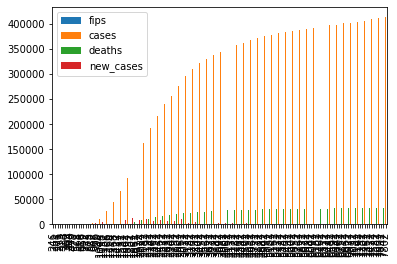

In [ ]:
ny_df.plot(kind='bar')

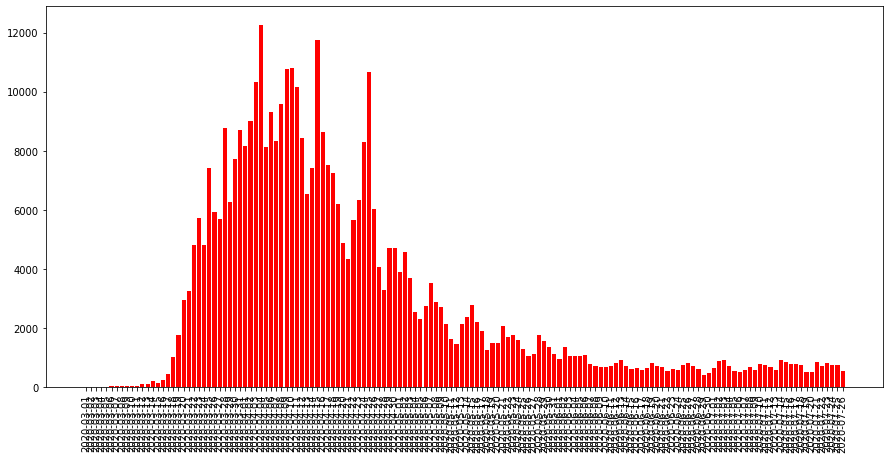

In [103]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

^Cases began in New York on March 1, 2020 and peaked in April at over 12,000 in one day. Then tapered off in May to current at under 2000 per day.  Thus, the distribution skews to the right favorably.

New York data in last 30 days

In [104]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]

In [105]:
# ny_dates_30

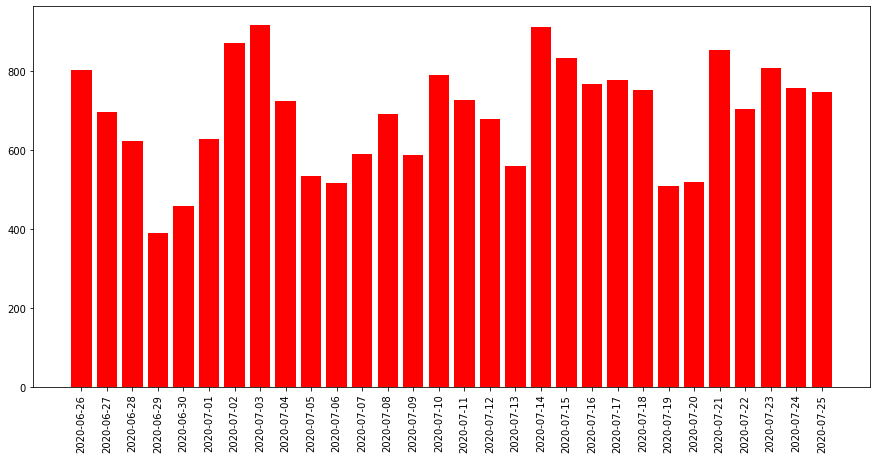

In [106]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

^At a closer look, in the last 30 days, new cases range up to 900 steadily as compared to the peak in April reaching over 12,000 one day.

**Exploratory Data Analysis for IL**

In [107]:
fig = px.bar(il_monthly_data,x='month',y='case_percent_change')
fig.show()

From 1 new case in February (and 2 in January), new cases jumped to 6,000 new cases in March showing almost a 600,000% increase.  New cases climb in April and May and begin to taper down after.

In [108]:
# Create figure
fig_il = go.Figure()

fig_il.add_trace(
    go.Scatter(x=list(il_df.date), y=list(il_df.new_cases)))

# Set title
fig_il.update_layout(
    title_text="Time series with range slider and selectors"
)

# Add range slider
fig_il.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig_il.show()

^May was the peak of the pandemic with the highest new cases to date at 4,045 in a day. New cases decline in June but July is showing an upward trend.

In [109]:
il_df['new_cases'].sum()

173079

In [110]:
il_cases = il_df['cases']
il_deaths = il_df['deaths']
il_dates = il_df['date']
il_new_cases = il_df['new_cases']

In [111]:
type(il_new_cases)

pandas.core.series.Series

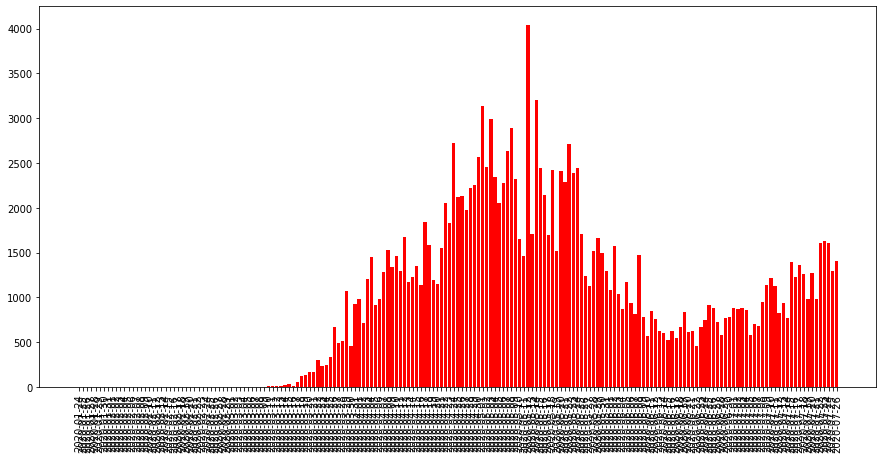

In [112]:
plt.figure(figsize=(15,7))
plt.bar(x=il_dates, height=il_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

^Cases began in Illinois in January 24, 2020 and peaked in May at over 4,045. Then tapered off in June but increasing in July notably.

Illinois York data in last 30 days

In [113]:
il_cases_30 = il_df['cases'][-31:-1]
il_deaths_30 = il_df['deaths'] [-31:-1]
il_dates_30 = il_df['date'][-31:-1]
il_new_cases_30 = il_df['new_cases'][-31:-1]

In [ ]:
# ny_dates_30

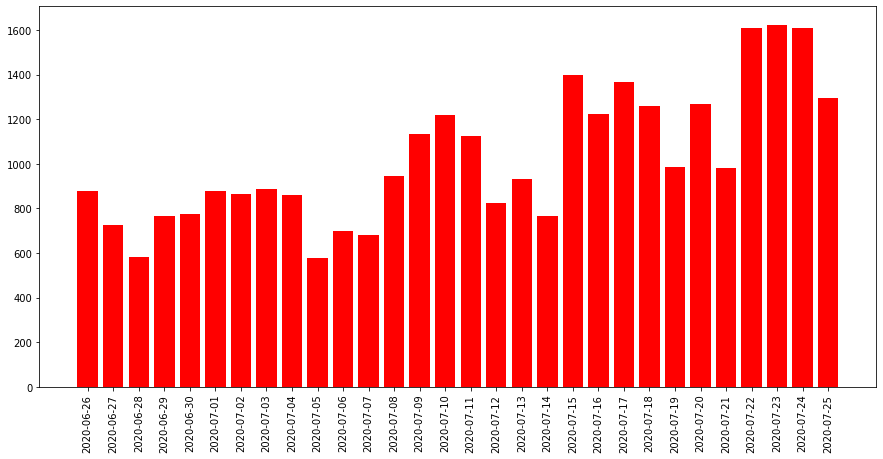

In [114]:
plt.figure(figsize=(15,7))
plt.bar(x=il_dates_30, height=il_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

^At a closer look, in the last 30 days, new cases range up to 1,600 as compared to the peak in May reaching to 4,045 in one day.  But from end of of June to end of July, new cases have doubled from 800+ to 1,600 in the last few days.

In [115]:
states = ['New York', 'Illinois','California','Florida', 'Texas','Arizona']


Comparing New York to Illinois and others states, California, Florida, Texas, and Arizona

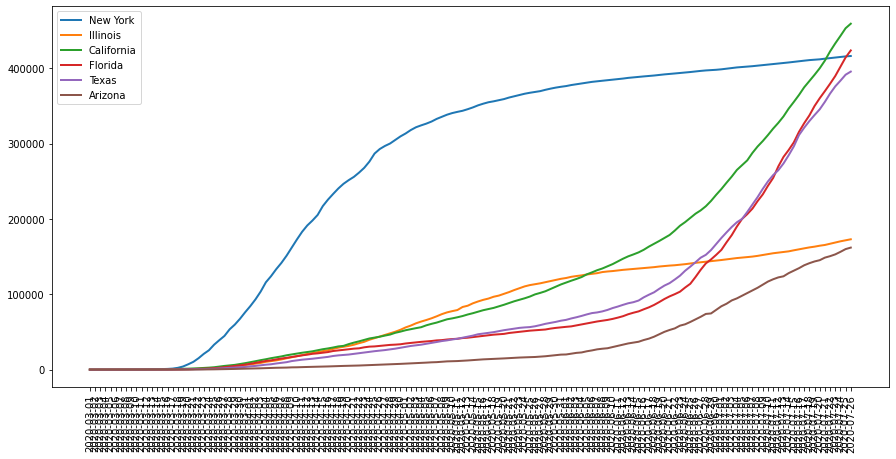

In [116]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-03-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()


Cases rose sharply in April and have flattened in subsequent months in NY and continue to hold steady whereas IL also showed a flattening in cases but there is steady rise in the current month of July.  Other states such as California, Florida, Texas, and Arizona are showing a sharp increase currently in July, with California surpassing New York in cumulative cases.

**Conclusion**

The first reported coronavirus case was in Washington State on Jan. 21, 2020. The first case reported in New York (NY) was on March 1, 2020 and in Illinois (IL) on January 24, 2020, 2 months earlier. The first death in NY was on March 14, 2020 and in IL on March 17, relatively the same time. As of July 26, there are 416,443 cases and 32,305 deaths in New York and 173,079 cases and 7,595 deaths in Illinois. The peak of the pandemic in NY was in April with new cases at 233,485 for the month and reaching a max of over 12,000 one day whereas the peak of the pandemic was in May with new cases at 67,670 and a max of about 4,000 in Illinois.  For NY, total new cases fell sharply by 72% in May compared to April and continue to deline in the months after, stabilizing to below 900 daily to date or 19% decrease in July from month before. For IL, total new cases fell by 65% in June compared to previous month but unlike NY, there is a rise of 18% in cases currently in July from previous month.

Cases have remained to flatten in NY in July whereas in Illinois, after a flattening, cases are steadily rising.  As for CA, FL, TX, and AZ, cases are increasing markely, with CA surpassing NY in cumulative cases.